<a href="https://colab.research.google.com/github/notSURZO/ML-algorithms/blob/main/Clustering_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***K-means clustering algorithm***

## Example 1

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


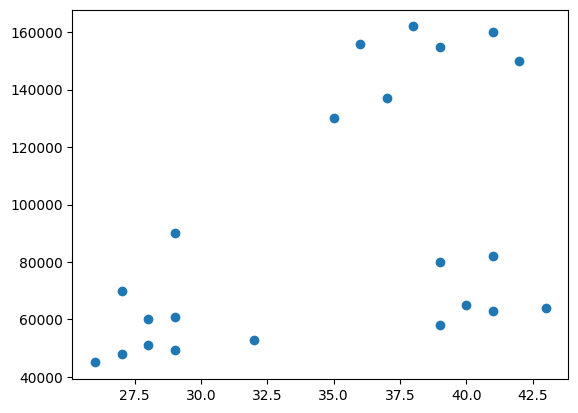

In [ ]:
plt.scatter(df["Age"], df["Income($)"])

MinMaxScaler Preprocessing

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df['Income($)'] = scaler.transform(df[['Income($)']])


scaler.fit(df[["Age"]])
df['Age'] = scaler.transform(df[['Age']])

df


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [ ]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
df["cluster"] =  y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


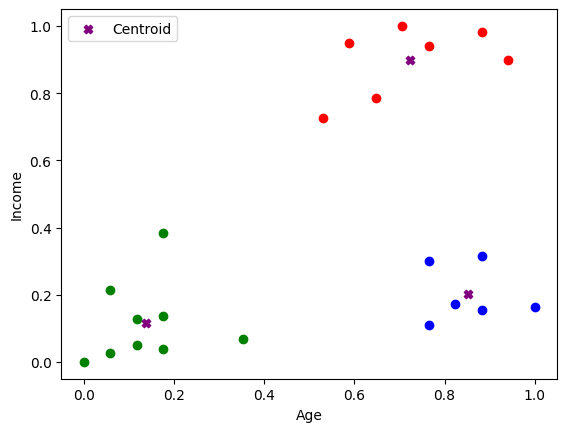

In [ ]:
df1 = df[df["cluster"] == 0]
df2 = df[df["cluster"] == 1]
df3 = df[df["cluster"] == 2]




plt.scatter(df1.Age, df1["Income($)"], color = "green")
plt.scatter(df2.Age, df2["Income($)"], color = "red")
plt.scatter(df3.Age, df3["Income($)"], color = "blue")


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color= 'purple', marker='X', label='Centroid')

plt.ylabel("Income")
plt.xlabel("Age")

plt.legend()

Elbow Plotting to determine best K

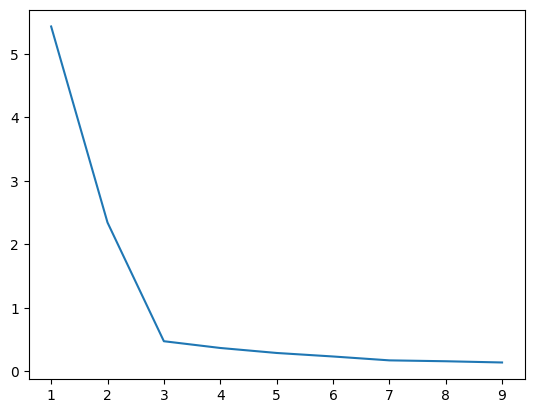

In [ ]:
k_rng = range(1,10)
sse_list = []

for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(df[['Age', 'Income($)']])
    sse_list.append(km.inertia_)

plt.plot(k_rng , sse_list)

### Example 2 (iris flower dataset)

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_dataset = load_iris(return_X_y = True,as_frame=True)

target_df = iris_dataset[0]

target_df.index

target_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
scaler = MinMaxScaler()
scaler.fit(target_df[["petal length (cm)"]])
target_df["petal length (cm)"] = scaler.transform(target_df[["petal length (cm)"]])

scaler.fit(target_df[["petal width (cm)"]])
target_df["petal width (cm)"] = scaler.transform(target_df[["petal width (cm)"]])

target_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,0.067797,0.041667
1,4.9,3.0,0.067797,0.041667
2,4.7,3.2,0.050847,0.041667
3,4.6,3.1,0.084746,0.041667
4,5.0,3.6,0.067797,0.041667
...,...,...,...,...
145,6.7,3.0,0.711864,0.916667
146,6.3,2.5,0.677966,0.750000
147,6.5,3.0,0.711864,0.791667
148,6.2,3.4,0.745763,0.916667


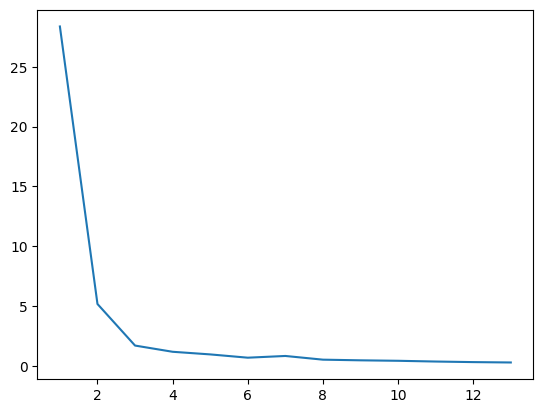

In [11]:
k_range = range(1,14)
sse = []

for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(target_df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

plt.plot(k_range, sse)

In [12]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(target_df[['petal length (cm)', 'petal width (cm)']])
target_df["cluster"] = y_pred

target_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,0.067797,0.041667,1
1,4.9,3.0,0.067797,0.041667,1
2,4.7,3.2,0.050847,0.041667,1
3,4.6,3.1,0.084746,0.041667,1
4,5.0,3.6,0.067797,0.041667,1
...,...,...,...,...,...
145,6.7,3.0,0.711864,0.916667,0
146,6.3,2.5,0.677966,0.750000,0
147,6.5,3.0,0.711864,0.791667,0
148,6.2,3.4,0.745763,0.916667,0


Text(0, 0.5, 'Petal Width')

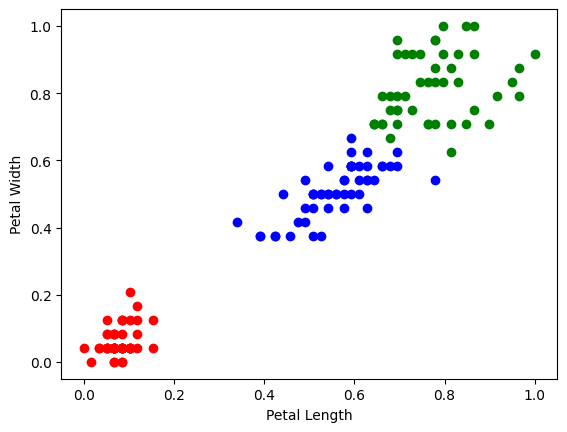

In [16]:
df1 = target_df[target_df.cluster == 0]
df2 = target_df[target_df.cluster == 1]
df3 = target_df[target_df.cluster == 2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'red' )
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color = 'blue' )

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")